In [1]:
#using Pkg; Pkg.add("ControlSystemIdentification"); Pkg.add("Plots")

In this notebook, we will explore impulse-response estimation using [ControlSystemIdentification.jl](https://github.com/baggepinnen/ControlSystemIdentification.jl)
Before any identification can begin, we need to load all the relevant packages.

In [2]:
using ControlSystemIdentification, ControlSystems, Plots
using Random, LinearAlgebra
default(size=(500,280))

We start by creating a system to use as the subject of identification and some data to use for identification

In [3]:
T = 200
h = 1   # This is the sample time
t = h:h:T
sim(sys,u) = lsim(sys, u, t)[1][:]
sys = c2d(tf(1,[1,2*0.1,0.1]), h)

u  = randn(1, length(t))
y  = sim(sys, u)
d = iddata(y',u,h)

InputOutput data of length 200 with 1 outputs and 1 inputs

The main functionality is in the function `impulseest`, and it's corresponding plot function `impulseestplot`. Estimation is done by fitting a high-order FIR model on the form
$$y_k = \sum_{j=1}^{n} b_j u_{k-j}$$
which when $n \rightarrow \infty$ can approximate any rational transfer function [(ref: Taylor series of rational function, Wikipedia)](https://en.wikipedia.org/wiki/Rational_function#Taylor_series)

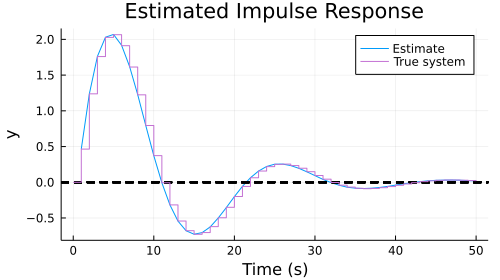

In [4]:
impulseestplot(d, 50, lab="Estimate")
plot!(impulse(sys,50), lab="True system")

That worked very well, but our data did not have any noise at all :/ If we add some noise, things will look a bit worse, but you get the deal

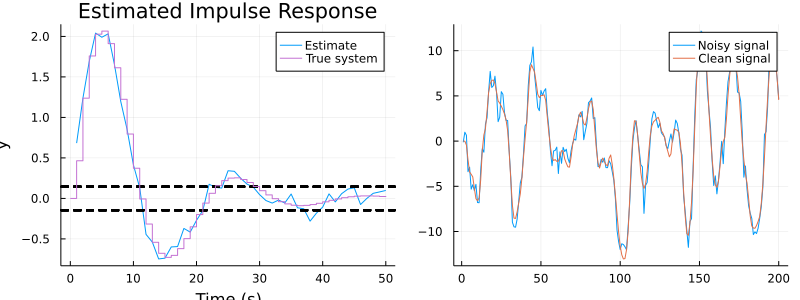

In [5]:
yn = y + 1randn(size(y))
dn = iddata(yn',u,h)
p1 = impulseestplot(dn,50, lab="Estimate")
plot!(impulse(sys,50), lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

Not too bad! The black dashed lines around zero indicate the 95% confidence bounds for the impulse-response coefficients.

Actually, let's hit it with a lot of noise just to see what happens

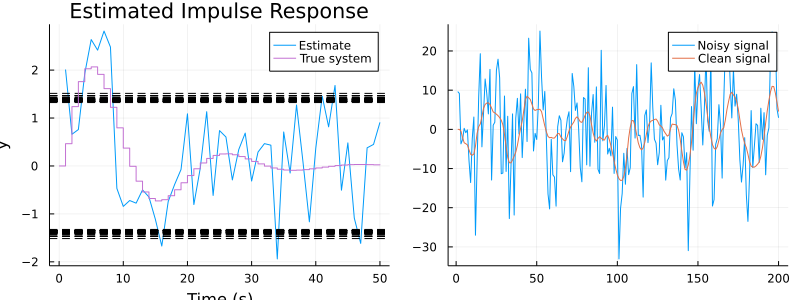

In [6]:
yn = y + 10randn(size(y))
dn = iddata(yn',u,h)
p1 = impulseestplot(dn,50, lab="Estimate")
plot!(impulse(sys,50), lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

Yeah that sucks, but what did you expect? Does it at least get better with more data?

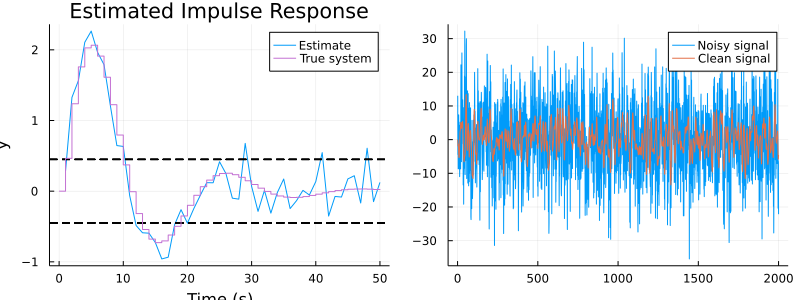

In [7]:
T = 2000
h = 1   # This is the sample time
t = h:h:T

u  = randn(1, length(t))
y  = sim(sys, u);
yn = y + 10randn(size(y))
dn = iddata(yn',u,h)
p1 = impulseestplot(dn, 50, lab="Estimate")
plot!(impulse(sys,50), lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

It did